## Importar libreria

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import ssl
import urllib.request

# Desactivar verificación de certificados SSL
ssl._create_default_https_context = ssl._create_unverified_context

## Importar base de datos

In [9]:
df = sns.load_dataset('penguins')

In [10]:
p_df = (
    df
    .dropna()
    .copy()
)

p_df['number_sex'] = p_df['sex'].map({'Male':1, 'Female':0})

p_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,number_sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1


## Modelo 1

In [11]:
modelo_1 = (smf.ols(
    formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
    data=p_df
).fit())

modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sun, 25 Aug 2024   Prob (F-statistic):           7.04e-46
Time:                        22:55:40   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
modelo_2 = (smf.ols(
    formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + number_sex',
    data=p_df
).fit())

modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sun, 25 Aug 2024   Prob (F-statistic):           7.04e-46
Time:                        22:55:40   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
modelo_3 =  (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm',
        data=p_df
    ).fit()
)
modelo_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          6.28e-122
Time:                        22:55:40   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
number_sex          541.0285     51.710     10.463      0.000     439.304     642.753
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Tabla de resultados

In [14]:
models_result = pd.DataFrame(
    dict(
        actual_value = p_df.body_mass_g,
        prediction1 = modelo_1.predict(),
        prediction2 = modelo_2.predict(),
        prediction3 = modelo_3.predict(),
        species = p_df.species,
        sex = p_df.sex,
    )
)
models_result

,actual_value,prediction1,prediction2,prediction3,species,sex
0,3750.0,3617.641192,3579.136946,3205.648453,Adelie,Male
1,3800.0,3836.725580,3343.220772,3456.414782,Adelie,Female
2,3250.0,3809.271371,3639.137335,3907.794176,Adelie,Female
4,3450.0,3350.786581,3457.954243,3807.487644,Adelie,Female
5,3650.0,3356.140070,3764.536023,3657.027846,Adelie,Male
...,...,...,...,...,...,...
338,4925.0,4951.159375,4730.939522,4860.706229,Gentoo,Female
340,4850.0,4833.930015,4719.043886,4910.859495,Gentoo,Female
341,5750.0,4899.545411,5402.946434,5261.932356,Gentoo,Male
342,5200.0,4641.476223,4563.248182,4760.399697,Gentoo,Female


## ECDS

<Axes: ylabel='Proportion'>

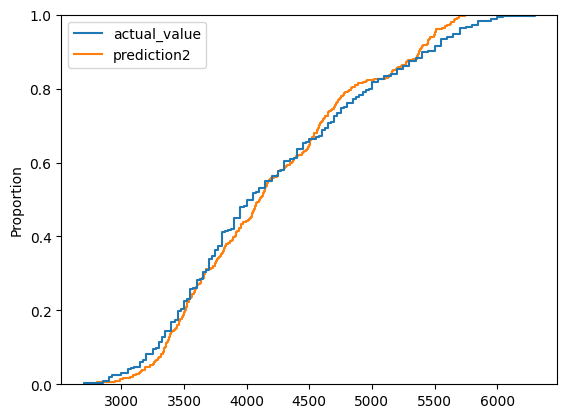

In [22]:
sns.ecdfplot(
    data=models_result[['actual_value','prediction2']]
)

<Axes: ylabel='Density'>

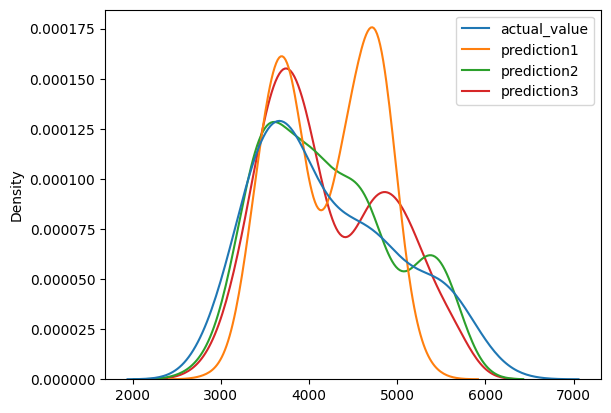

In [24]:
sns.kdeplot(
        data=models_result
)

<Axes: ylabel='Density'>

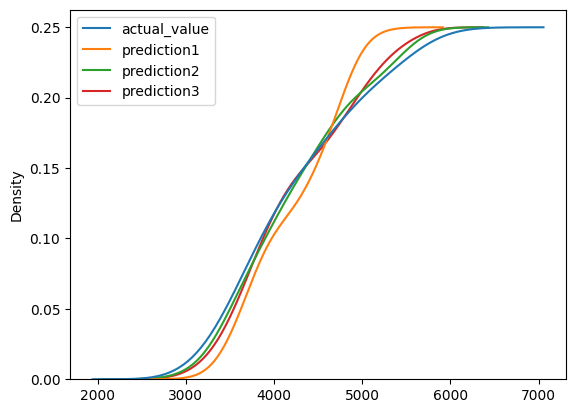

In [25]:
sns.kdeplot(
        data=models_result,
        cumulative=True
)